# To predict New Cases in Malaysia Using LSTM Neural Network

## 1. Import Packages

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os

In [2]:
PATH = os.getcwd()
CSV_PATH_TRAIN = os.path.join(PATH,"cases_malaysia_train.csv")
CSV_PATH_TEST = os.path.join(PATH,"cases_malaysia_test.csv")
df_train = pd.read_csv(CSV_PATH_TRAIN)
df_test = pd.read_csv(CSV_PATH_TEST) 

## 2. Data Inspection

In [3]:
import matplotlib.pyplot as plt
df_train.head()

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,25/1/2020,4,4,0,4,0,4,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26/1/2020,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27/1/2020,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28/1/2020,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29/1/2020,3,3,0,7,0,3,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_test.head()

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,5/12/2021,4298.0,23,4928,61813,136,1017,38,3093,150,...,330,130,49,0,13,3,12,69,0,39
1,6/12/2021,4262.0,15,5894,60139,97,1036,39,3056,131,...,352,141,49,0,10,0,2,30,0,55
2,7/12/2021,4965.0,29,4817,60251,138,1130,46,3642,147,...,395,169,81,0,3,13,39,36,0,47
3,8/12/2021,5020.0,17,4525,60709,154,1162,41,3674,143,...,378,154,43,0,2,3,0,32,1,116
4,9/12/2021,5446.0,20,5427,60700,367,1207,53,4034,152,...,367,161,46,0,0,1,8,153,0,205


In [5]:
df_train.tail()

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
675,30/11/2021,4879,24,5168,64978,97,1125,55,3595,104,...,358,165,60,0.0,25.0,0.0,28.0,33.0,0.0,31.0
676,1/12/2021,5439,21,6803,63583,110,1363,54,3900,122,...,387,197,61,0.0,25.0,0.0,8.0,33.0,0.0,31.0
677,2/12/2021,5806,11,7246,62099,339,1325,40,4271,170,...,410,174,59,0.0,14.0,2.0,13.0,148.0,52.0,110.0
678,3/12/2021,5551,23,5301,62303,179,1312,46,4046,147,...,411,167,48,0.0,6.0,0.0,3.0,104.0,0.0,66.0
679,4/12/2021,4896,18,4676,62481,159,1143,56,3529,168,...,327,158,52,0.0,3.0,1.0,22.0,52.0,0.0,81.0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     680 non-null    object 
 1   cases_new                680 non-null    object 
 2   cases_import             680 non-null    int64  
 3   cases_recovered          680 non-null    int64  
 4   cases_active             680 non-null    int64  
 5   cases_cluster            680 non-null    int64  
 6   cases_unvax              680 non-null    int64  
 7   cases_pvax               680 non-null    int64  
 8   cases_fvax               680 non-null    int64  
 9   cases_boost              680 non-null    int64  
 10  cases_child              680 non-null    int64  
 11  cases_adolescent         680 non-null    int64  
 12  cases_adult              680 non-null    int64  
 13  cases_elderly            680 non-null    int64  
 14  cases_0_4                6

In [7]:
print(df_train[['cluster_import', 'cluster_religious', 'cluster_community', 'cluster_highRisk',
               'cluster_education', 'cluster_detentionCentre', 'cluster_workplace']].dtypes)

cluster_import             float64
cluster_religious          float64
cluster_community          float64
cluster_highRisk           float64
cluster_education          float64
cluster_detentionCentre    float64
cluster_workplace          float64
dtype: object


## 3. Data Cleaning

In [8]:
from sklearn.impute import KNNImputer
columns_to_impute = ['cluster_import','cluster_religious','cluster_community','cluster_highRisk',
                    'cluster_education','cluster_detentionCentre','cluster_workplace']

imputer = KNNImputer(n_neighbors=5)
df_train[columns_to_impute] = imputer.fit_transform(df_train[columns_to_impute])
df_train.isna().sum()

date                       0
cases_new                  0
cases_import               0
cases_recovered            0
cases_active               0
cases_cluster              0
cases_unvax                0
cases_pvax                 0
cases_fvax                 0
cases_boost                0
cases_child                0
cases_adolescent           0
cases_adult                0
cases_elderly              0
cases_0_4                  0
cases_5_11                 0
cases_12_17                0
cases_18_29                0
cases_30_39                0
cases_40_49                0
cases_50_59                0
cases_60_69                0
cases_70_79                0
cases_80                   0
cluster_import             0
cluster_religious          0
cluster_community          0
cluster_highRisk           0
cluster_education          0
cluster_detentionCentre    0
cluster_workplace          0
dtype: int64

In [21]:
#df_train[['cluster_import','cluster_religious','cluster_community','cluster_highRisk',
         #'cluster_education','cluster_detentionCentre','cluster_workplace']]=df_train[['cluster_import','cluster_religious','cluster_community','cluster_highRisk',
         #'cluster_education','cluster_detentionCentre','cluster_workplace']].interpolate()

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     680 non-null    object 
 1   cases_new                680 non-null    object 
 2   cases_import             680 non-null    int64  
 3   cases_recovered          680 non-null    int64  
 4   cases_active             680 non-null    int64  
 5   cases_cluster            680 non-null    int64  
 6   cases_unvax              680 non-null    int64  
 7   cases_pvax               680 non-null    int64  
 8   cases_fvax               680 non-null    int64  
 9   cases_boost              680 non-null    int64  
 10  cases_child              680 non-null    int64  
 11  cases_adolescent         680 non-null    int64  
 12  cases_adult              680 non-null    int64  
 13  cases_elderly            680 non-null    int64  
 14  cases_0_4                6

In [10]:
#to check the target variable's value
non_numeric_rows = df_train[(df_train['cases_new'] == '?') | pd.to_numeric(df_train['cases_new'], errors='coerce').isna()]
print(non_numeric_rows)


           date cases_new  cases_import  cases_recovered  cases_active  \
98     2/5/2020                      11              116          1747   
217   29/8/2020                      10                8           153   
273  24/10/2020         ?            11              671          8953   
279  30/10/2020                       0              491         10380   
287   7/11/2020                       0             1029         11646   
427   27/3/2021         ?             5             1257         14127   
445   14/4/2021         ?             6             1485         16625   
446   15/4/2021         ?            19             1259         17510   
476   15/5/2021                       9             3432         41914   
587    3/9/2021         ?            14            22399        254719   
615   1/10/2021                      14            15891        159932   
640  26/10/2021         ?            15             5607         72903   

     cases_cluster  cases_unvax  case

In [11]:
df_train['cases_new'] = df_train['cases_new'].replace('?', np.nan)
df_train['cases_new'] = pd.to_numeric(df_train['cases_new'], errors='coerce')

print(df_train['cases_new'])

0         4.0
1         0.0
2         0.0
3         0.0
4         3.0
        ...  
675    4879.0
676    5439.0
677    5806.0
678    5551.0
679    4896.0
Name: cases_new, Length: 680, dtype: float64


In [12]:
df_train['cases_new'] = df_train['cases_new'].interpolate()

In [13]:
df_train['cases_new'] = df_train['cases_new'].astype('int64')
print(df_train['cases_new'])

0         4
1         0
2         0
3         0
4         3
       ... 
675    4879
676    5439
677    5806
678    5551
679    4896
Name: cases_new, Length: 680, dtype: int64


In [14]:
df_train.isna().sum()

date                       0
cases_new                  0
cases_import               0
cases_recovered            0
cases_active               0
cases_cluster              0
cases_unvax                0
cases_pvax                 0
cases_fvax                 0
cases_boost                0
cases_child                0
cases_adolescent           0
cases_adult                0
cases_elderly              0
cases_0_4                  0
cases_5_11                 0
cases_12_17                0
cases_18_29                0
cases_30_39                0
cases_40_49                0
cases_50_59                0
cases_60_69                0
cases_70_79                0
cases_80                   0
cluster_import             0
cluster_religious          0
cluster_community          0
cluster_highRisk           0
cluster_education          0
cluster_detentionCentre    0
cluster_workplace          0
dtype: int64

In [15]:
df_test.tail()

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
95,10/3/2022,30787.0,608,26457,314211,282,4454,663,9118,16552,...,1851,905,336,0,0,1,14,153,18,96
96,11/3/2022,32800.0,541,24444,322507,309,4782,773,9122,18123,...,2060,927,361,0,0,3,42,97,58,109
97,12/3/2022,26250.0,545,25089,323618,269,3569,707,7151,14823,...,1724,788,302,0,0,3,42,97,58,109
98,13/3/2022,22535.0,361,25356,320785,163,3222,505,6057,12751,...,1448,700,288,0,0,7,40,8,61,153
99,14/3/2022,22030.0,394,33872,308943,180,3133,549,5828,12520,...,1339,677,295,0,0,3,7,56,10,104


In [16]:
df_test['cases_new'] = df_test['cases_new'].interpolate()

In [17]:
df_test['cases_new'] = df_test['cases_new'].astype('int64')

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   date                     100 non-null    object
 1   cases_new                100 non-null    int64 
 2   cases_import             100 non-null    int64 
 3   cases_recovered          100 non-null    int64 
 4   cases_active             100 non-null    int64 
 5   cases_cluster            100 non-null    int64 
 6   cases_unvax              100 non-null    int64 
 7   cases_pvax               100 non-null    int64 
 8   cases_fvax               100 non-null    int64 
 9   cases_boost              100 non-null    int64 
 10  cases_child              100 non-null    int64 
 11  cases_adolescent         100 non-null    int64 
 12  cases_adult              100 non-null    int64 
 13  cases_elderly            100 non-null    int64 
 14  cases_0_4                100 non-null    in

## 4. Features Selection

In [19]:
from sklearn.preprocessing import MinMaxScaler

df_train_cases = df_train['cases_new']
df_test_cases = df_test['cases_new']

mms = MinMaxScaler()
df_train_cases_scaled = mms.fit_transform(np.expand_dims(df_train_cases,axis=-1))
df_test_cases_scaled = mms.transform(np.expand_dims(df_test_cases,axis=-1))

In [20]:
#Data windowing
window_size = 30 #30 window = 30 input
X_train = []
y_train = []

for i in range(window_size,len(df_train_cases_scaled)):
    X_train.append(df_train_cases_scaled[i-window_size:i])
    y_train.append(df_train_cases_scaled[i,0])

X_train = np.array(X_train)
y_train = np.array(y_train)

In [21]:
#Concatenate train and test data together
df_cases_stacked = np.concatenate((df_train_cases_scaled,df_test_cases_scaled))

#use method 2
length_days = window_size + len(df_test_cases_scaled)
tot_input = df_cases_stacked[-length_days:]
data_test = df_cases_stacked[-length_days:]

X_test = []
y_test = []

for i in range(window_size, len(data_test)):
    X_test.append(data_test[i-window_size:i])
    y_test.append(data_test[i])

X_train = np.array(X_train)
y_train = np.array(y_train)

## 5. Model Development

In [22]:
from tensorflow.keras import Sequential,Input
from tensorflow.keras.layers import LSTM,Dropout,Dense
from tensorflow.keras.utils import plot_model

input_shape = np.shape(X_train)[1:]

model = Sequential()
model.add(Input(shape=(input_shape)))
model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1)) #usually, reggression dont need activation

model.summary()
plot_model(model,show_shapes=True,show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 30, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 30, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 6

### Compile the Model

In [23]:
model.compile(optimizer='adam',loss='mse',metrics=['mae','mape','mse'])

## 6. Model Training

In [24]:
print(X_train.shape)
print(y_train.shape) 

(650, 30, 1)
(650,)


In [25]:
y_train = y_train.reshape((y_train.shape[0], 1))

In [26]:
print(X_train.shape)
print(y_train.shape) 

(650, 30, 1)
(650, 1)


In [27]:
X_test = []
y_test = []

for i in range(window_size, len(data_test)):
    X_test.append(data_test[i - window_size:i])
    y_test.append(data_test[i])

X_test = np.array(X_test)
y_test = np.array(y_test)

#Reshape X_test to have the same shape as X_train
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [30]:
#Create a TensorBoard callback object for the usage of TensorBoard
#import tensorflow as tf
#import datetime
#from tensorflow.keras import callbacks
#from tensorflow.keras.callbacks import TensorBoard
#base_log_path = r"tensorboard_logs\capstone_assignment_1"
#log_path = os.path.join(base_log_path,datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tb = callbacks.TensorBoard(log_path)

In [31]:
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=[tb])

Epoch 1/100
21/21 [==============================] - 6s 268ms/step - loss: 0.0015 - mae: 0.0244 - mape: 64821.3164 - mse: 0.0015 - val_loss: 0.0125 - val_mae: 0.0701 - val_mape: 14.8854 - val_mse: 0.0125
Epoch 2/100
21/21 [==============================] - 5s 220ms/step - loss: 0.0017 - mae: 0.0252 - mape: 149711.6094 - mse: 0.0017 - val_loss: 0.0148 - val_mae: 0.0760 - val_mape: 15.5611 - val_mse: 0.0148
Epoch 3/100
21/21 [==============================] - 4s 191ms/step - loss: 0.0014 - mae: 0.0237 - mape: 92390.3594 - mse: 0.0014 - val_loss: 0.0137 - val_mae: 0.0728 - val_mape: 14.5598 - val_mse: 0.0137
Epoch 4/100
21/21 [==============================] - 5s 224ms/step - loss: 0.0013 - mae: 0.0229 - mape: 88269.1484 - mse: 0.0013 - val_loss: 0.0134 - val_mae: 0.0722 - val_mape: 14.5644 - val_mse: 0.0134
Epoch 5/100
21/21 [==============================] - 7s 316ms/step - loss: 0.0014 - mae: 0.0231 - mape: 84300.4219 - mse: 0.0014 - val_loss: 0.0120 - val_mae: 0.0706 - val_mape: 16.71

In [84]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=100)

Epoch 1/100
21/21 [==============================] - 25s 417ms/step - loss: 0.0173 - mae: 0.0844 - mape: 378990.0938 - val_loss: 0.0579 - val_mae: 0.1461 - val_mape: 25.5520
Epoch 2/100
21/21 [==============================] - 6s 256ms/step - loss: 0.0054 - mae: 0.0470 - mape: 220260.4531 - val_loss: 0.0341 - val_mae: 0.1156 - val_mape: 24.1804
Epoch 3/100
21/21 [==============================] - 4s 203ms/step - loss: 0.0032 - mae: 0.0338 - mape: 96445.3750 - val_loss: 0.0270 - val_mae: 0.1069 - val_mape: 26.9666
Epoch 4/100
21/21 [==============================] - 4s 198ms/step - loss: 0.0028 - mae: 0.0306 - mape: 61072.4922 - val_loss: 0.0212 - val_mae: 0.0915 - val_mape: 19.8093
Epoch 5/100
21/21 [==============================] - 4s 209ms/step - loss: 0.0022 - mae: 0.0275 - mape: 38411.5078 - val_loss: 0.0207 - val_mae: 0.0909 - val_mape: 19.9387
Epoch 6/100
21/21 [==============================] - 4s 205ms/step - loss: 0.0022 - mae: 0.0287 - mape: 100193.1328 - val_loss: 0.0232 - 

In [40]:
#history = model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=100, callbacks=[tb])

Epoch 1/100
21/21 [==============================] - 6s 223ms/step - loss: 0.0014 - mae: 0.0230 - mape: 84805.9844 - val_loss: 0.0125 - val_mae: 0.0694 - val_mape: 14.3833
Epoch 2/100
21/21 [==============================] - 4s 201ms/step - loss: 0.0016 - mae: 0.0251 - mape: 53885.1094 - val_loss: 0.0135 - val_mae: 0.0726 - val_mape: 14.9239
Epoch 3/100
21/21 [==============================] - 4s 189ms/step - loss: 0.0015 - mae: 0.0248 - mape: 45255.2227 - val_loss: 0.0171 - val_mae: 0.0811 - val_mape: 15.3085
Epoch 4/100
21/21 [==============================] - 5s 253ms/step - loss: 0.0016 - mae: 0.0252 - mape: 83879.6328 - val_loss: 0.0158 - val_mae: 0.0786 - val_mape: 15.2469
Epoch 5/100
21/21 [==============================] - 4s 203ms/step - loss: 0.0017 - mae: 0.0255 - mape: 30884.7168 - val_loss: 0.0174 - val_mae: 0.0808 - val_mape: 15.5037
Epoch 6/100
21/21 [==============================] - 4s 211ms/step - loss: 0.0017 - mae: 0.0263 - mape: 76949.7656 - val_loss: 0.0143 - val_

In [85]:
# To check the MAPE error

# Obtain predictions on the testing dataset
predictions = model.predict(X_test)

# Calculate APE for each data point
ape = np.abs((y_test - predictions) / y_test) * 100

# Calculate MAPE for the testing dataset
mape = np.mean(ape)

# Calculate MAE for the testing dataset
mae = np.mean(np.abs(y_test - predictions))

# Calculate MABE for the testing dataset
mabe = np.mean(np.abs(y_test - np.mean(y_test)))

# Calculate MAPE Error Ratio
mape_error_ratio = ((mae - mabe) / mabe) * 100

# Check if MAPE Error Ratio is less than 1%
if mape_error_ratio < 1:
    print("MAPE is less than 1 percent for the testing dataset.")
else:
    print("MAPE is not less than 1 percent for the testing dataset.")


4/4 [==============================] - 4s 64ms/step
MAPE is less than 1 percent for the testing dataset.


## 7. Model Evaluation

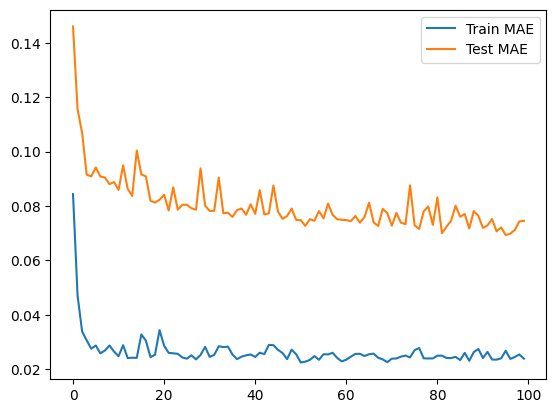

In [86]:
#Plot the evaluation graph
plt.figure()
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.legend(['Train MAE','Test MAE'])
plt.show()

### Model Deployment

In [87]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 44ms/step


In [88]:
#perform inverse transform
actual_cases = mms.inverse_transform(y_test)
predicted_cases = mms.inverse_transform(y_pred)

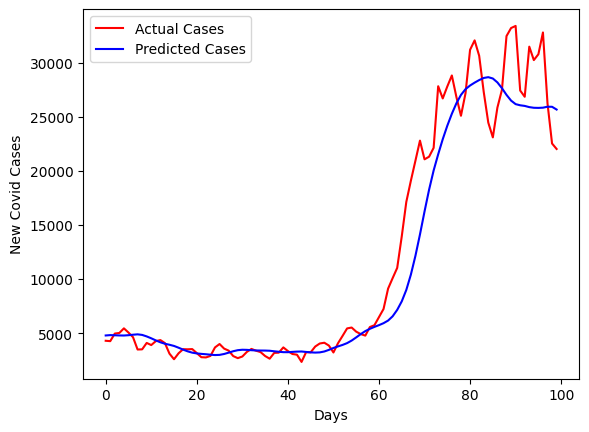

In [89]:
#Plot actual vs predicted
plt.figure()
plt.plot(actual_cases,color='red')
plt.plot(predicted_cases,color='blue')
plt.xlabel("Days")
plt.ylabel("New Covid Cases")
plt.legend(['Actual Cases','Predicted Cases'])